In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\100.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\71.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\72.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\73.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\74.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glioma_tumor\75.jpg
D:\rupeshbengade\Deeplearningproject\MedicalDomainProject\DS\Brain_Tumor\kaggle\input\brain-tumor-classification-mri\Testing\glio

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [8]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


print(
X_train)

print(Y_train)


[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [10]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)

X_train.shape

(300, 150, 150, 3)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [12]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [15]:

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:

history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
8/8 [==============================] - 52s 6s/step - loss: 10.8332 - accuracy: 0.3745 - val_loss: 1.1068 - val_accuracy: 0.1852
Epoch 2/20
8/8 [==============================] - 47s 6s/step - loss: 1.0955 - accuracy: 0.3663 - val_loss: 1.0975 - val_accuracy: 0.2222
Epoch 3/20
8/8 [==============================] - 47s 6s/step - loss: 1.0894 - accuracy: 0.4074 - val_loss: 1.0892 - val_accuracy: 0.7778
Epoch 4/20
8/8 [==============================] - 47s 6s/step - loss: 1.0509 - accuracy: 0.4650 - val_loss: 1.0035 - val_accuracy: 0.9259
Epoch 5/20
8/8 [==============================] - 46s 6s/step - loss: 0.7894 - accuracy: 0.6420 - val_loss: 0.4421 - val_accuracy: 0.8889
Epoch 6/20
8/8 [==============================] - 46s 6s/step - loss: 0.5022 - accuracy: 0.8066 - val_loss: 0.1477 - val_accuracy: 0.9630
Epoch 7/20
8/8 [==============================] - 47s 6s/step - loss: 0.3984 - accuracy: 0.8807 - val_loss: 0.3685 - val_accuracy: 0.8889
Epoch 8/20
8/8 [=================

In [17]:
#model.save('braintumor.h5')

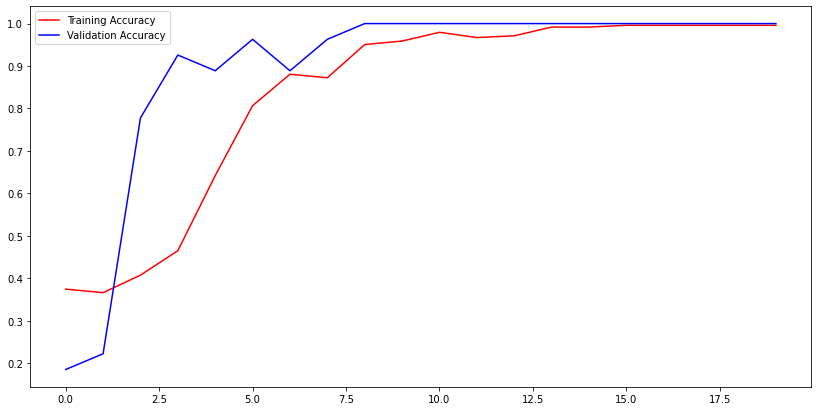

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

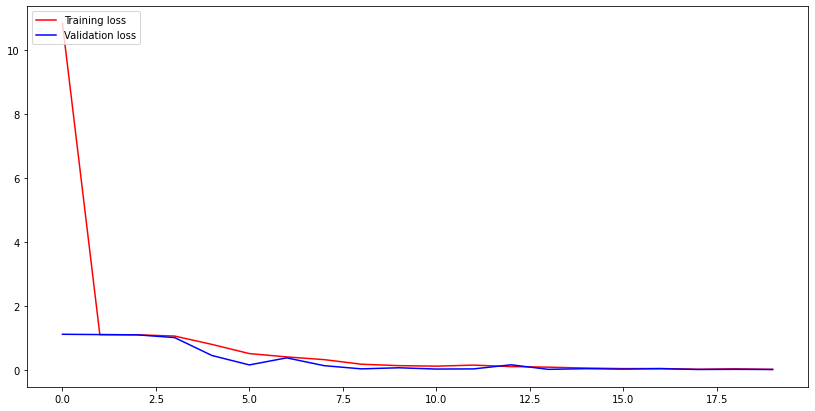

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


In [20]:
img = cv2.imread('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Testing\\glioma_tumor\\99.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

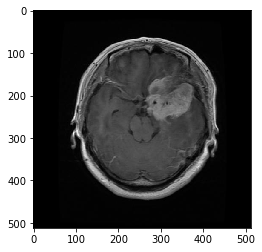

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Training\\glioma_tumor\\2.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
a=model.predict(img_array)
print(type(a))
indices = a.argmax()



print( 'predictions Value----------->', indices)



print("***************************************************************")



1/1 [==============================] - 0s 237ms/step
<class 'numpy.ndarray'>
predictions Value-----------> 0
***************************************************************


In [24]:
a=model.predict(img_array)
indices = a.argmax()
if indices == 0:
    print("glioma")
elif indices == 1:
    print("Melign")
elif indices == 2:
    print("Pituitary")


1/1 [==============================] - 0s 51ms/step
glioma


In [25]:
model.predict(X_test)

1/1 [==============================] - 1s 696ms/step


array([[9.99999881e-01, 1.18295617e-07, 4.51464111e-08],
       [1.00000000e+00, 1.27227576e-10, 9.25925569e-12],
       [1.00000000e+00, 7.12128134e-10, 5.72664449e-09],
       [9.99998808e-01, 1.89116435e-07, 9.52856738e-07],
       [5.02253184e-04, 8.05468662e-05, 9.99417186e-01],
       [1.07450515e-03, 9.98907208e-01, 1.83726333e-05],
       [3.02340114e-03, 9.96923506e-01, 5.31368569e-05],
       [5.18791983e-03, 9.94400680e-01, 4.11463407e-04],
       [1.60812924e-04, 1.57007264e-04, 9.99682188e-01],
       [1.00000000e+00, 4.31803794e-11, 1.94852832e-11],
       [9.98806477e-01, 1.09005432e-05, 1.18256814e-03],
       [1.42097706e-02, 9.70958769e-01, 1.48314545e-02],
       [2.57986933e-02, 9.71991777e-01, 2.20953347e-03],
       [2.04628753e-03, 9.97679174e-01, 2.74638878e-04],
       [1.19662582e-04, 9.44488929e-05, 9.99785960e-01],
       [9.99998808e-01, 1.17850777e-06, 1.36024054e-08],
       [9.37513821e-03, 9.85451758e-01, 5.17312484e-03],
       [2.09177677e-02, 9.77970

In [26]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [27]:
from tensorflow.keras.models import load_model

In [28]:
l = load_model('braintumor.h5')



1/1 [==============================] - 1s 699ms/step


array([[9.99599278e-01, 9.86992973e-07, 3.99810699e-04],
       [1.00000000e+00, 4.14030626e-13, 1.97824784e-10],
       [9.95310605e-01, 2.21158558e-08, 4.68937028e-03],
       [9.99891639e-01, 9.10795006e-06, 9.93200883e-05],
       [2.59388617e-04, 1.78605074e-03, 9.97954488e-01],
       [9.71712961e-06, 9.99963641e-01, 2.65916533e-05],
       [2.26818156e-04, 9.99718010e-01, 5.51804005e-05],
       [3.73547264e-05, 9.98889625e-01, 1.07302447e-03],
       [3.73441580e-05, 9.83074890e-04, 9.98979509e-01],
       [9.99995947e-01, 2.68110201e-09, 4.06983781e-06],
       [9.80129957e-01, 4.30699811e-06, 1.98657159e-02],
       [4.38551535e-04, 9.99030590e-01, 5.30885824e-04],
       [6.68966153e-04, 9.97932792e-01, 1.39825582e-03],
       [9.89403343e-05, 9.98031080e-01, 1.86992483e-03],
       [4.00867384e-06, 2.74914782e-04, 9.99721110e-01],
       [9.84949291e-01, 2.12650537e-03, 1.29242884e-02],
       [6.34577736e-06, 9.99963760e-01, 2.99179119e-05],
       [2.71676457e-04, 9.99605

In [31]:
img = cv2.imread('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Testing\\glioma_tumor\\99.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [32]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

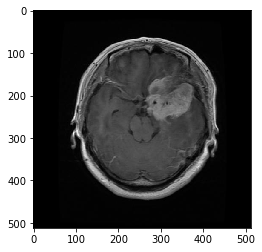

In [33]:
from tensorflow.keras.preprocessing import image
img = image.load_img('D:\\rupeshbengade\\Deeplearningproject\\MedicalDomainProject\\DS\\Brain_Tumor\\kaggle\\input\\brain-tumor-classification-mri\\Training\\glioma_tumor\\2.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [34]:
a=l.predict(img_array)
indices = a.argmax()
if indices == 0:
    print("glioma")
elif indices == 1:
    print("Melign")
elif indices == 2:
    print("Pituitary")

1/1 [==============================] - 0s 51ms/step
glioma


In [35]:
l.predict(X_test)

1/1 [==============================] - 1s 692ms/step


array([[9.99599278e-01, 9.86992973e-07, 3.99810699e-04],
       [1.00000000e+00, 4.14030626e-13, 1.97824784e-10],
       [9.95310605e-01, 2.21158558e-08, 4.68937028e-03],
       [9.99891639e-01, 9.10795006e-06, 9.93200883e-05],
       [2.59388617e-04, 1.78605074e-03, 9.97954488e-01],
       [9.71712961e-06, 9.99963641e-01, 2.65916533e-05],
       [2.26818156e-04, 9.99718010e-01, 5.51804005e-05],
       [3.73547264e-05, 9.98889625e-01, 1.07302447e-03],
       [3.73441580e-05, 9.83074890e-04, 9.98979509e-01],
       [9.99995947e-01, 2.68110201e-09, 4.06983781e-06],
       [9.80129957e-01, 4.30699811e-06, 1.98657159e-02],
       [4.38551535e-04, 9.99030590e-01, 5.30885824e-04],
       [6.68966153e-04, 9.97932792e-01, 1.39825582e-03],
       [9.89403343e-05, 9.98031080e-01, 1.86992483e-03],
       [4.00867384e-06, 2.74914782e-04, 9.99721110e-01],
       [9.84949291e-01, 2.12650537e-03, 1.29242884e-02],
       [6.34577736e-06, 9.99963760e-01, 2.99179119e-05],
       [2.71676457e-04, 9.99605